In [1]:
from keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Data
We load the neural codes for the Caltech101 image data set, obtained from a pre-trained VGG16 network in "Practical-3.3.0_preprocess-caltech101.ipynb".

In [2]:
with open(os.path.join("data","caltech101_VGG16_fc2.p"), "rb") as f:
    X_fc2, y, X_paths, classes = pickle.load(f)

# Nearest Neighbor Classifier
For image search, we can train a simple nearest neighbor classifier from scikit-learn. Here we use the L2-norm (Lp-norm with p=2) as a distance measure between representations.

In [3]:
neigh = NearestNeighbors(n_neighbors=5, p=2)
neigh.fit(X_fc2)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

Let's test it on some images from the dataset itself. For each example input image, we obtain the (L2) distances to its 5 nearest neighbors, as well as the indices of those nearest neighbors.

In [4]:
indices = [1000, 1500, 2000]
X = X_fc2[indices]
nn = neigh.kneighbors(X)
nn  # nn = (distances, indices)

(array([[ 0.        , 77.7445031 , 79.4700772 , 80.59146166, 80.93545747],
        [ 0.        , 76.80827532, 81.79120552, 82.17920276, 82.58526   ],
        [ 0.        , 81.37656043, 85.91263035, 87.30496283, 87.75192579]]),
 array([[1000,  999, 1024, 1038, 1025],
        [1500, 1558, 7647, 4143, 1527],
        [2000, 2043, 5602, 5683, 2027]], dtype=int64))

Let's visualise the examples (input images) we chose.

Class: bass


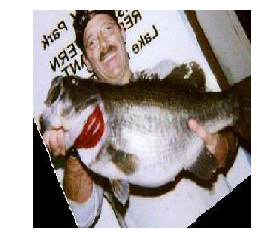

Class: butterfly


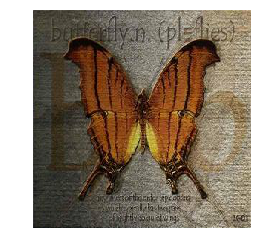

Class: chandelier


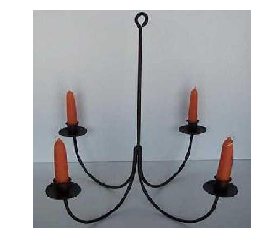

In [5]:
def show_img(filepath):
    img = image.load_img(filepath, target_size=(224,224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

for i in indices:
    print("Class:", classes[y[i]])
    show_img(X_paths[i])

Now we visualise each of the input images along with their 5 nearest neighbors.

============= original: =============
(Class: bass)


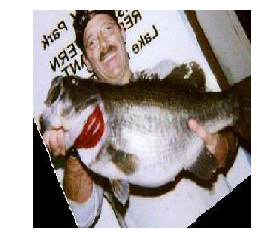

at distance 0.0:
(Class: bass)


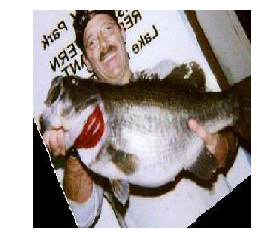

at distance 77.74450310267049:
(Class: bass)


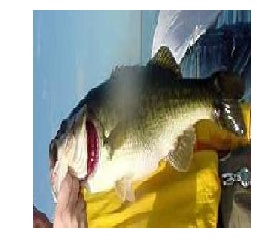

at distance 79.47007720400751:
(Class: bass)


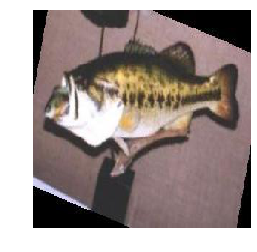

at distance 80.5914616595288:
(Class: bass)


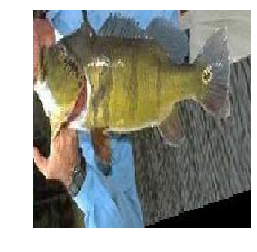

at distance 80.9354574737597:
(Class: bass)


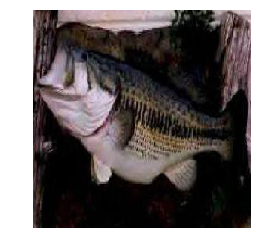

============= original: =============
(Class: butterfly)


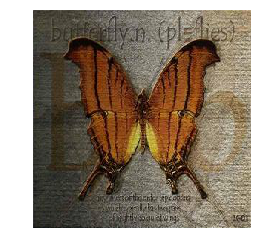

at distance 0.0:
(Class: butterfly)


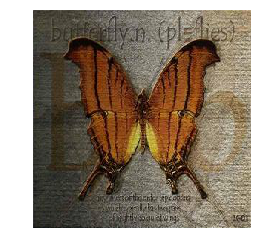

at distance 76.80827532154305:
(Class: butterfly)


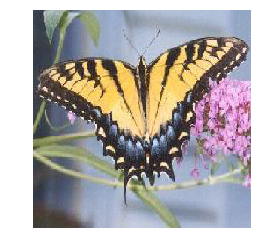

at distance 81.7912055236571:
(Class: starfish)


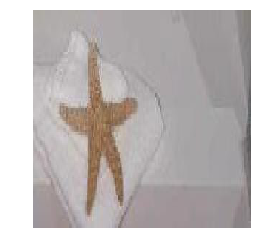

at distance 82.17920276484527:
(Class: garfield)


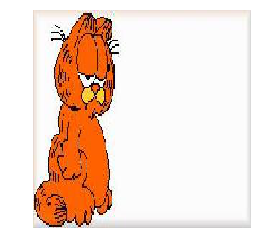

at distance 82.58526000277645:
(Class: butterfly)


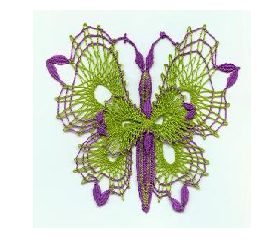

============= original: =============
(Class: chandelier)


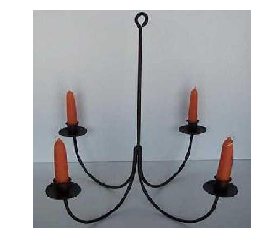

at distance 0.0:
(Class: chandelier)


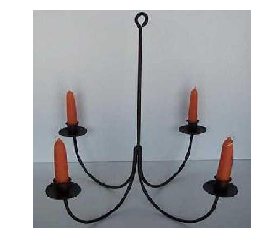

at distance 81.37656042527335:
(Class: chandelier)


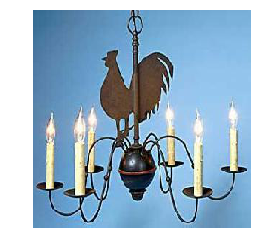

at distance 85.91263035402646:
(Class: menorah)


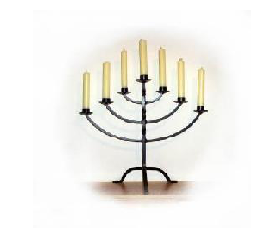

at distance 87.30496282659644:
(Class: menorah)


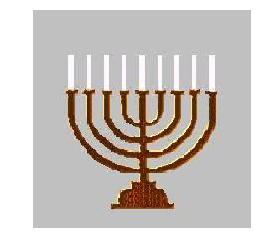

at distance 87.75192579440257:
(Class: chandelier)


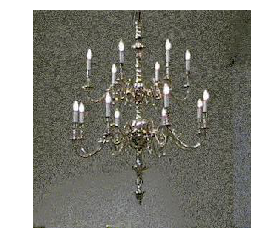

In [6]:
for i, distances, nn_indices in zip(indices, nn[0], nn[1]):
    print("============= original: =============")
    print("(Class: {})".format(classes[y[i]]))
    show_img(X_paths[i])
    for dist, j in zip(distances, nn_indices):
        print("at distance {}:".format(dist))
        print("(Class: {})".format(classes[y[j]]))
        show_img(X_paths[j])